# <font color = blue> Uber Business Problem </font>
### Problem Statement:
Issues regarding cancellation and Non-availability of cabs for traveling to and from the airport during early morning cab bookings. This may impact the revenue generation of the company and issues faced by the customers. 

### Business Goal:
Identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation. So the company can improve its revenue generation.


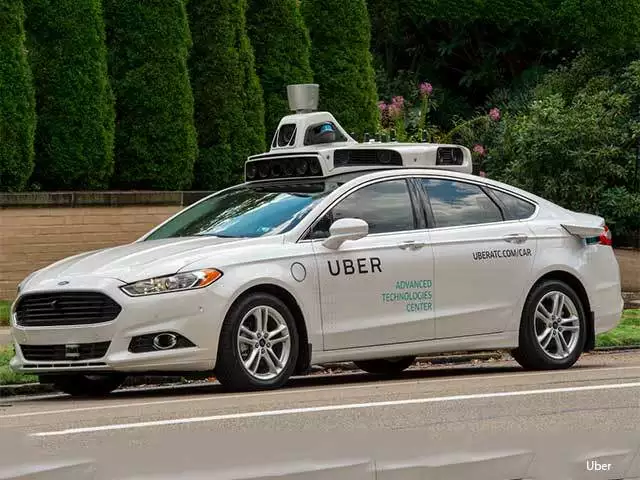

### Definition of Supply - Demand Gap:
- It is the difference between the number of requests and the availability of the cars at a particular request time, day and pickup point. 
- Whereas, request represents Demand and Availability of the Cars shows Supply.

In [232]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')


In [233]:
# Importing the required important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

import missingno as mno


In [234]:
# To set the Row, Column and Width of the Dataframe to show on Jupyter Notebook
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


### Task 1: Reading the data

- ### Subtask 1.1: Read the Uber Car Request Data.

Read the Uber Car Request file provided and store it in a dataframe `car_rent`.

In [235]:
# Read the csv file using 'read_csv'. 
car_rent = pd.read_csv("G:/UOA/UoA/On_Line Portal Classess/Course-2/5_Assignment_EDA/Uber Request Data.csv")


In [236]:
# To check the fist 5 rows and headers of the given dataset
car_rent.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [237]:
# To check the shape of the dataframe
car_rent.shape


(6745, 6)

In [238]:
# Check the column-wise info of the dataframe
car_rent.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [239]:
# To check any duplicate value in various columns
car_rent.duplicated().sum()


0

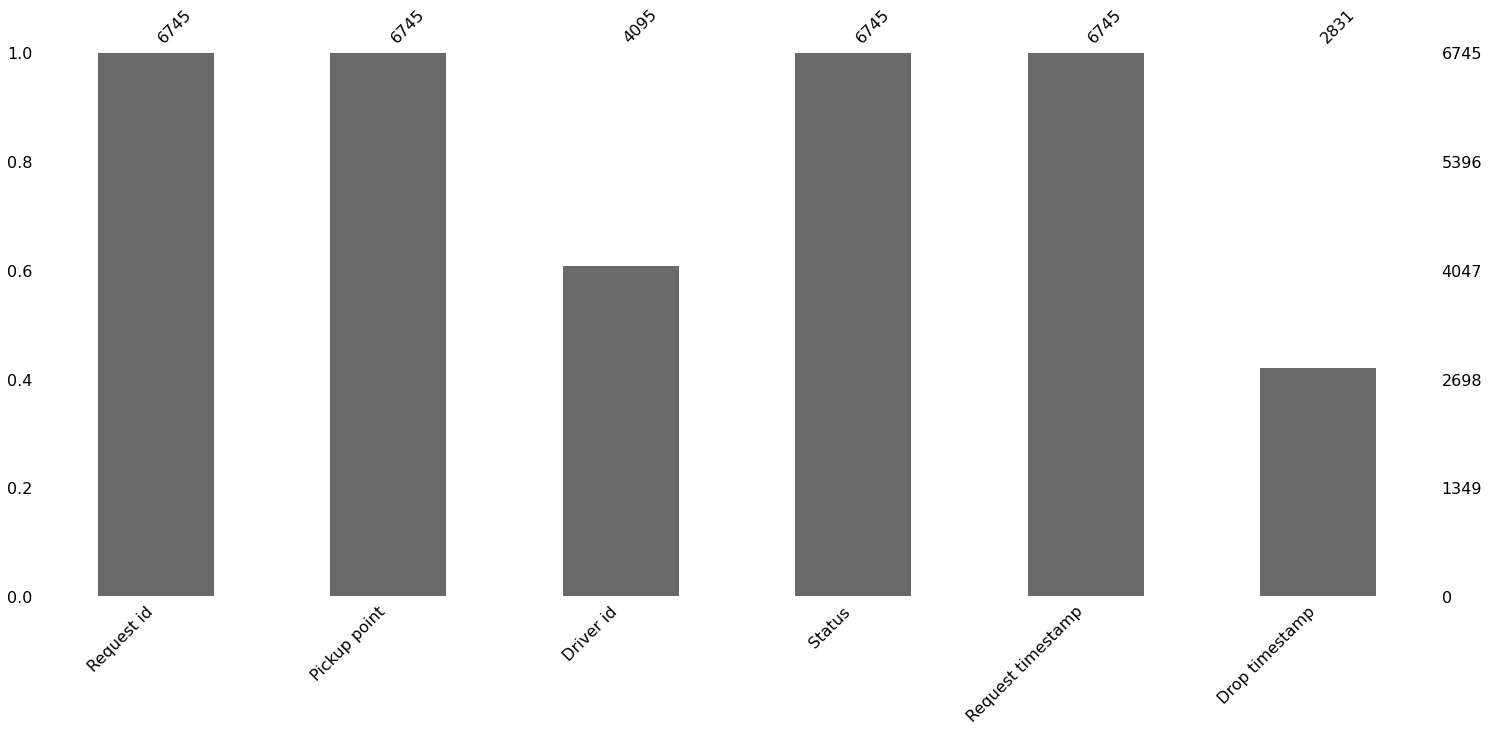

In [240]:
# Graphical representation of null values in columns
mno.bar(car_rent)
plt.show()


In [241]:
# To Check the number of null values in the columns
car_rent.isnull().sum().sort_values(ascending=False)


Drop timestamp       3914
Driver id            2650
Request timestamp       0
Status                  0
Pickup point            0
Request id              0
dtype: int64

In [242]:
# To Check the % number of null values in the columns
round(car_rent.isnull().sum()/len(car_rent),2).sort_values(ascending=False)


Drop timestamp       0.58
Driver id            0.39
Request timestamp    0.00
Status               0.00
Pickup point         0.00
Request id           0.00
dtype: float64

### Inferences:
- As per the aobve analysis Null values in Drive id and Drop timestamp is 39% and 58% respectively but as we need to do assessment only where pickup point is 'Airport'.

In [243]:
# To do value counts on a column
round(car_rent['Pickup point'].value_counts(dropna=False, normalize=True),2).sort_values(ascending=False)


City       0.52
Airport    0.48
Name: Pickup point, dtype: float64

### Task 2: Data Handling and Cleaning

In [244]:
# To get the columns of the database
car_rent.columns


Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [245]:
# to rename the columns
car_rent.rename(columns={'Request id':'Request_id', 'Pickup point':'Pickup_Point', 'Driver id':'Driver_id', 
                         'Request timestamp':'Request_timestamp', 'Drop timestamp':'Drop_timestamp'}, inplace = True)


In [246]:
# To get the columns of the database
car_rent.columns


Index(['Request_id', 'Pickup_Point', 'Driver_id', 'Status',
       'Request_timestamp', 'Drop_timestamp'],
      dtype='object')

In [247]:
# Check the number of null values in the columns
car_rent.isnull().sum().sort_values(ascending=False)


Drop_timestamp       3914
Driver_id            2650
Request_timestamp       0
Status                  0
Pickup_Point            0
Request_id              0
dtype: int64

In [248]:
# Check the % number of null values in the columns
round(car_rent.isnull().sum()/len(car_rent)*100).sort_values(ascending=False)


Drop_timestamp       58.0
Driver_id            39.0
Request_timestamp     0.0
Status                0.0
Pickup_Point          0.0
Request_id            0.0
dtype: float64

#### Inferences:
- Null value ratio for 'Drop timestamp' and 'Driver id' column is greater than or approx. equal to **40%**.

In [249]:
# To count trip status report
Trip_report = car_rent.Status.value_counts(dropna=False).sort_values(ascending=False)
Trip_report


Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [250]:
# To count trip status report %
Trip_report_per = round(car_rent.Status.value_counts(dropna=False, normalize=True)*100).sort_values(ascending=False)
Trip_report_per


Trip Completed       42.0
No Cars Available    39.0
Cancelled            19.0
Name: Status, dtype: float64

#### Inferences:
- There are total **3914** counts for **'Drop_timestamp'** which is equivalent to the sum of **'Cancelled' trips and 'No Cars Available' (1264+2650** which shows that the missing/null values in **'Drop_timestamp'** are reasonable.


- There are total **2650** counts for the **'Driver_id'** which is surprisingly eqivalent to the **'No Cars Available'** status. Therefore even with such a high % of null/missing values in the columns still this null/missing values are valid.

In [251]:
# To change the datatype from 'Object' to 'datetime' for 'Request_timestamp', 'Drop_timestamp' columns
car_rent['Request_timestamp'] = car_rent['Request_timestamp'].astype('datetime64[ns]')
car_rent['Drop_timestamp'] = car_rent['Drop_timestamp'].astype('datetime64[ns]')


In [252]:
# Check the column-wise info of the dataframe
car_rent.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request_id         6745 non-null   int64         
 1   Pickup_Point       6745 non-null   object        
 2   Driver_id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request_timestamp  6745 non-null   datetime64[ns]
 5   Drop_timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [253]:
# Get 'Request Weekdays' from the 'Drop_timestamp'
car_rent['Request_Weekday'] = car_rent['Request_timestamp'].dt.day_name() 


In [254]:
# Get 'Request Hours' from the 'Request_timestamp'
car_rent['Request_Hour'] = car_rent['Request_timestamp'].dt.hour 


In [255]:
# To get details of the dataset
car_rent.head()


,Request_id,Pickup_Point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Weekday,Request_Hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Wednesday,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Wednesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Wednesday,8


In [256]:
# Check the column-wise info of the dataframe
car_rent.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request_id         6745 non-null   int64         
 1   Pickup_Point       6745 non-null   object        
 2   Driver_id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request_timestamp  6745 non-null   datetime64[ns]
 5   Drop_timestamp     2831 non-null   datetime64[ns]
 6   Request_Weekday    6745 non-null   object        
 7   Request_Hour       6745 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 421.7+ KB


#### To set the following Eight different time slots of the day
- Early Morning ('03:00 - 05:59')
- Morning ('06:00 - 08:59')
- Early Afternoon ('09:00 - 11:59')
- Afternoon ('12:00 - 14:59')
- Early Evening ('15:00 - 17:59')
- Late Evening ('18:00 - 20:59')
- Night ('21:00 - 23:59')
- Mid Night ('00:00 - 02:59')

In [257]:
# To get time slots according to requet hour
car_rent["Time_Slots"] = car_rent["Request_Hour"].apply(lambda x: "Mid Night" if x<=3 else ("Early Morning" if x<=6 
                                                                               else ("Morning" if x<=9 else ("Early Afternoon" if x<=12 
                                                                               else ("Afternoon" if x<=15 else ("Early Evening" if x<=18 
                                                                               else ("Late Evening" if x<=21 else "Night" )))))))


In [258]:
# To check the rows and headers of the dataset after making some implementation
car_rent.head(30)


,Request_id,Pickup_Point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Weekday,Request_Hour,Time_Slots
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Monday,11,Early Afternoon
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Monday,17,Early Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Wednesday,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Wednesday,21,Late Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Wednesday,8,Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,Wednesday,21,Late Evening
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,Thursday,6,Early Morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,Friday,5,Early Morning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,Friday,17,Early Evening
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,Monday,6,Early Morning


##### To create a seperate column to show the Supply /Demand Status. 
- When their is **'Yes'** then there is an availability of Taxi, means **Supply** is there.
- When there is **'No'** then there is an Unavailability of Taxi, means there is a **Demand**.

In [259]:
# A sepearate column to represent Supply-Demand gap 
car_rent["Supply_Status"] = car_rent["Status"].apply(lambda x: "Yes" if x=="Trip Completed" else "No")


In [260]:
# To check the rows and headers of the dataset after making some implementation
car_rent.head()


,Request_id,Pickup_Point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Weekday,Request_Hour,Time_Slots,Supply_Status
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Monday,11,Early Afternoon,Yes
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Monday,17,Early Evening,Yes
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Wednesday,9,Morning,Yes
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Wednesday,21,Late Evening,Yes
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Wednesday,8,Morning,Yes


#### Categorising data columns related to 'Airport' and 'City' pickups in a seperate dataframe.

In [261]:
## Taking data related to 'City' pickup only
Pickup_City = car_rent[~car_rent['Pickup_Point'].isin(["Airport"])]
Pickup_City.head()


,Request_id,Pickup_Point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Weekday,Request_Hour,Time_Slots,Supply_Status
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Wednesday,9,Morning,Yes
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Wednesday,8,Morning,Yes
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,Friday,17,Early Evening,Yes
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,Monday,6,Early Morning,Yes
11,1983,City,2.0,Trip Completed,2016-12-07 12:30:00,2016-12-07 12:57:00,Wednesday,12,Early Afternoon,Yes


In [262]:
## Taking data related to 'Airport' pickup only
Pickup_Airport = car_rent[~car_rent['Pickup_Point'].isin(["City"])]
Pickup_Airport.head()


,Request_id,Pickup_Point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Weekday,Request_Hour,Time_Slots,Supply_Status
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Monday,11,Early Afternoon,Yes
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Monday,17,Early Evening,Yes
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Wednesday,21,Late Evening,Yes
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,Wednesday,21,Late Evening,Yes
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,Thursday,6,Early Morning,Yes


In [263]:
# To check the shape of the dataframe
Pickup_City.shape


(3507, 10)

In [264]:
# To count trip status report from 'City-Airport'
Trip_City_report = Pickup_City.Status.value_counts(dropna=False).sort_values(ascending=False)
Trip_City_report


Trip Completed       1504
Cancelled            1066
No Cars Available     937
Name: Status, dtype: int64

In [265]:
# To count trip status report %
Trip_City_report_per = round(Pickup_City.Status.value_counts(dropna=False, normalize=True)*100).sort_values(ascending=False)
Trip_City_report_per


Trip Completed       43.0
Cancelled            30.0
No Cars Available    27.0
Name: Status, dtype: float64

In [266]:
# Check the number of null values in the dataset
Pickup_City.isnull().sum().sort_values(ascending=False)


Drop_timestamp       2003
Driver_id             937
Supply_Status           0
Time_Slots              0
Request_Hour            0
Request_Weekday         0
Request_timestamp       0
Status                  0
Pickup_Point            0
Request_id              0
dtype: int64

#### Inferences for City pickups:
- There are total **2003** counts for **'Drop_timestamp'** which is equivalent to the sum of **'Cancelled' trips and 'No Cars Available' (1066+937 = 2003)** which shows that the missing/null values in **'Drop_timestamp'** are reasonable.


- There are total **937** counts for the **'Driver_id'** which is surprisingly eqivalent to the **'No Cars Available'** status. Therefore even with such a high % of null/missing values in the columns still this null/missing values are valid.

In [267]:
# To check the shape of the dataframe
Pickup_Airport.shape


(3238, 10)

In [268]:
# Check the number of null values in the related dataset
Pickup_Airport.isnull().sum().sort_values(ascending=False)


Drop_timestamp       1911
Driver_id            1713
Supply_Status           0
Time_Slots              0
Request_Hour            0
Request_Weekday         0
Request_timestamp       0
Status                  0
Pickup_Point            0
Request_id              0
dtype: int64

In [269]:
# To count trip status report
Trip_Air_report = Pickup_Airport.Status.value_counts(dropna=False).sort_values(ascending=False)
Trip_Air_report


No Cars Available    1713
Trip Completed       1327
Cancelled             198
Name: Status, dtype: int64

In [270]:
# To count trip status report %
Trip_Air_report_per = round(Pickup_Airport.Status.value_counts(dropna=False, normalize=True)*100).sort_values(ascending=False)
Trip_Air_report_per


No Cars Available    53.0
Trip Completed       41.0
Cancelled             6.0
Name: Status, dtype: float64

#### Inferences:
- There are total **1911** counts for **'Drop_timestamp'** which is equivalent to the sum of **'Cancelled' trips and 'No Cars Available' (1713+198 = 1911)** which shows that the missing/null values in **'Drop_timestamp'** are reasonable.


- There are total **1713** counts for the **'Driver_id'** which is surprisingly eqivalent to the **'No Cars Available'** status. Therefore even with such a high % of null/missing values in the columns still this null/missing values are valid.

##### To analyze most problemetic Pickup point. 
- The most problematic time slot is when there is 'No cars available' at a particular Pickup Points. 

In [271]:
# To get Problmetic Trips in a dataframe
Prob_Trips = car_rent[~car_rent['Supply_Status'].isin(["Yes"])]
Prob_Trips.head()


,Request_id,Pickup_Point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Weekday,Request_Hour,Time_Slots,Supply_Status
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,Wednesday,6,Early Morning,No
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,Thursday,17,Early Evening,No
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,Thursday,20,Late Evening,No
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,Friday,10,Early Afternoon,No
2835,2347,Airport,2.0,Cancelled,2016-12-07 19:14:00,NaT,Wednesday,19,Late Evening,No


In [272]:
# To check the shape of the dataframe
Prob_Trips.shape


(3914, 10)

In [273]:
# To count trip status report
Prob_Trips_count = Prob_Trips['Pickup_Point'].value_counts(dropna=False).sort_values(ascending=False)
Prob_Trips_count


City       2003
Airport    1911
Name: Pickup_Point, dtype: int64

In [274]:
# To count Problmetic trips % Status 
Prob_Trips_per = round(Prob_Trips.Pickup_Point.value_counts(dropna=False, normalize=True)*100).sort_values(ascending=False)
Prob_Trips_per


City       51.0
Airport    49.0
Name: Pickup_Point, dtype: float64

##### Inferences:
- From above count it is clear that most **problemetic trips** are from **City to Airport** than **Airport to City**.
- **City-Airport** pickups having **51%**, whreas, **Airport-City** is of **49%** 

In [275]:
# To count trip status on Weekdays
Weekday_report = car_rent.Request_Weekday.value_counts(dropna=False).sort_values(ascending=False)
Weekday_report


Wednesday    2644
Friday       1381
Monday       1367
Thursday     1353
Name: Request_Weekday, dtype: int64

In [276]:
# To count trip status % on Weekdays
Weekday_report_per = round(car_rent.Request_Weekday.value_counts(dropna=False, normalize=True)*100).sort_values(ascending=False)
Weekday_report_per


Wednesday    39.0
Thursday     20.0
Monday       20.0
Friday       20.0
Name: Request_Weekday, dtype: float64

##### Inferences:
- It is showing that highest requests are on **Wednesday**.

### Task 3: Data Visualization

#### Sub Task 3.1: Univariate Analysis

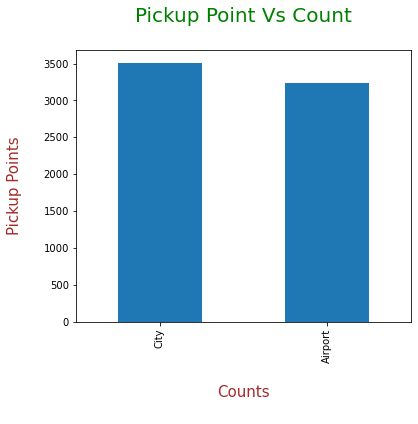

In [277]:
# To analyze Trips for both the Pickup Points
fig = plt.figure(figsize=(6,5))
car_rent['Pickup_Point'].value_counts().plot.bar()
plt.title("Pickup Point Vs Count\n", fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("\nCounts\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("Pickup Points\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


#### Inferences:
- As per the above graph Pickup points are little **more from City-Airport** in comparision to Airport.

#### Sub Task 3.2: Segmented Univariate Analysis

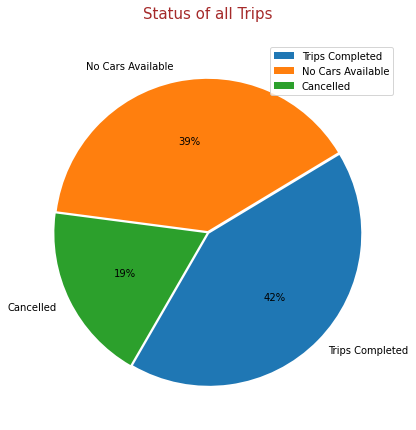

In [278]:
# To get Pie distribution for all pickups
plt.figure(figsize=(7,7))
expl = (0.01, 0.01, 0.01)
trip_label = ['Trips Completed', 'No Cars Available' ,'Cancelled']
plt.pie(Trip_report, labels = trip_label, autopct = '%1.0f%%', explode=expl, startangle = -120)
plt.title("Status of all Trips\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.legend(trip_label, loc='upper right')
plt.show()


#### Inferences:
- From above Pie graph it is clear that for all the trips **Trips Completed** ratio is **42%** whereas, **'No Cars Available'** ratio is **39%**, which is showing the Demand and Supply gap for all the Trips is 39% and the **Cancelled** Trips are only **19%**.

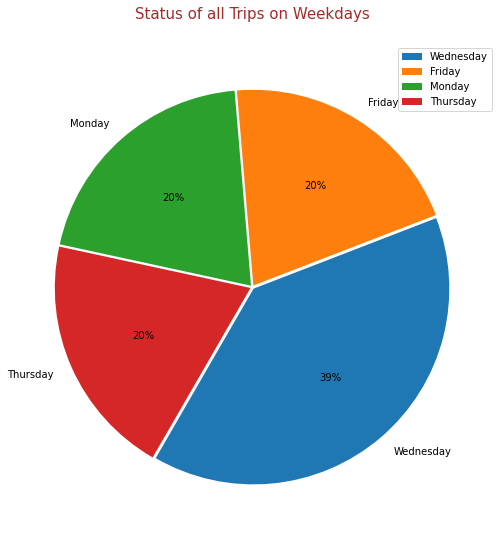

In [279]:
# To get Pie distribution for all pickups on Weekdays
plt.figure(figsize=(9,9))
expl = (0.01, 0.01, 0.01, 0.01)
trip_label = ['Wednesday','Friday', 'Monday', 'Thursday']
plt.pie(Weekday_report, labels = trip_label, autopct = '%1.0f%%', explode=expl, startangle = -120)
plt.title("Status of all Trips on Weekdays\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.legend(trip_label, loc='upper right')
plt.show()


##### Inferences:
- As per the above pie it is clear that on **Wednesday** there is little **Higher demand**.

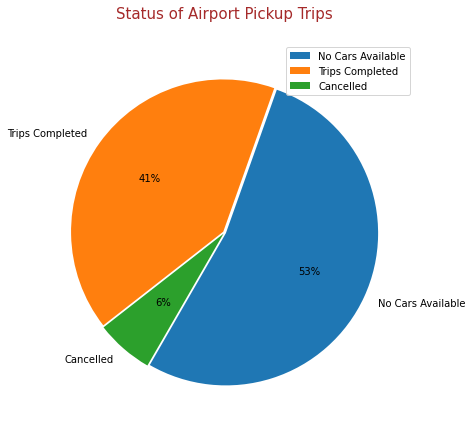

In [280]:
# To get Pie distribution for 'Airport' pickups
plt.figure(figsize=(7,7))
expl = (0.01, 0.01, 0.01)
trip_label = ['No Cars Available', 'Trips Completed','Cancelled']
plt.pie(Trip_Air_report, labels = trip_label, autopct = '%1.0f%%', explode=expl, startangle = -120)
plt.title("Status of Airport Pickup Trips\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.legend(trip_label, loc='upper right')
plt.show()


#### Inferences:
- As per the above Pie chart it is clear that **Completed trips** are **41%** whereas **Cancelled trips** are only **6%** but the **No Cars Available** ratio is very high up to **53%**. Which is showing a **huge Demand Supply gap** for the **Airport trips**.

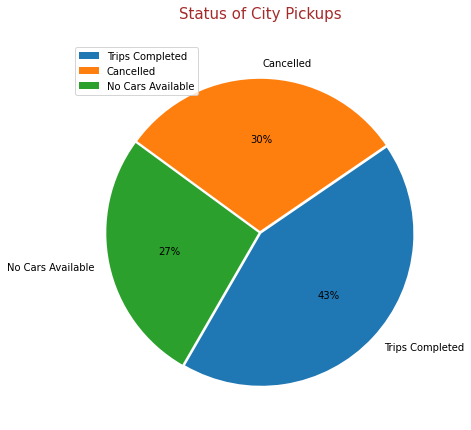

In [281]:
# To get Pie distribution for 'City' pickups
plt.figure(figsize=(7,7))
expl = (0.01, 0.01, 0.01)
trip_label = ['Trips Completed', 'Cancelled', 'No Cars Available']
plt.pie(Trip_City_report, labels = trip_label, autopct = '%1.0f%%', explode=expl, startangle = -120)
plt.title("Status of City Pickups\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.legend(trip_label, loc='upper left')
plt.show()


#### Inferences:
- As per the above Pie chart it is clear that **Completed trips** are **43%** whereas **Cancelled trips** are only **30%** but the **No Cars Available** ratio is okay up to **27%**. Which is showing a little less demand supply gap for the City trips.

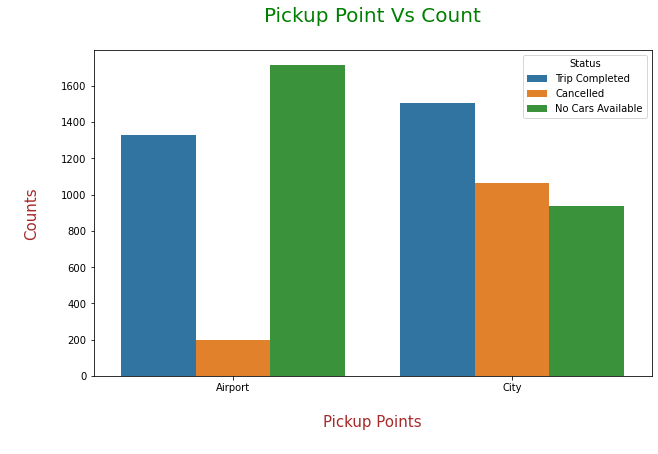

In [282]:
# To analyze Pickup Points
fig = plt.figure(figsize=(10,6))
sns.countplot(data = car_rent, x = car_rent['Pickup_Point'], hue = car_rent['Status'])
plt.title("Pickup Point Vs Count\n", fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("\nPickup Points\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("\nCounts\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


#### Inferences:
- As per the above graph **'Cancelled'** trips are **higher** from **City to Airport** than Airport to City.
- Whereas, **No Cars Availability** is **higher** at **Airport** than City which is may be beacuase of maximum passengers are taking Cabs from Airport to City.
- But for Trip completed difference from Airport to City and City to Airport is very less.


##### Problemetic Trip request

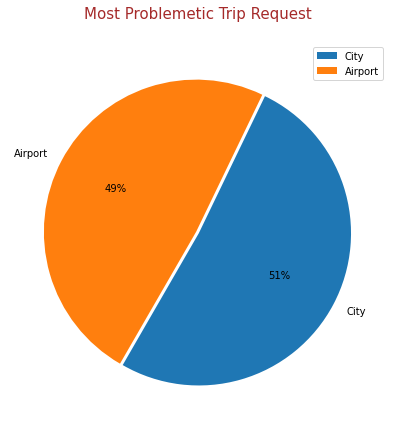

In [283]:
# To get Pie distribution for Problemetic Trip requests
plt.figure(figsize=(7,7))
expl = (0.01, 0.01)
trip_label = ['City','Airport']
plt.pie(Prob_Trips_count, labels = trip_label, autopct = '%1.0f%%', explode=expl, startangle = -120)
plt.title("Most Problemetic Trip Request\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.legend(trip_label, loc='upper right')
plt.show()


##### Inferences:
- As per the above Pie chart analysis it is clear that most **Problemetic trip** is **City to Airport** as less cars are available for that trip.


##### Problemetic Hours

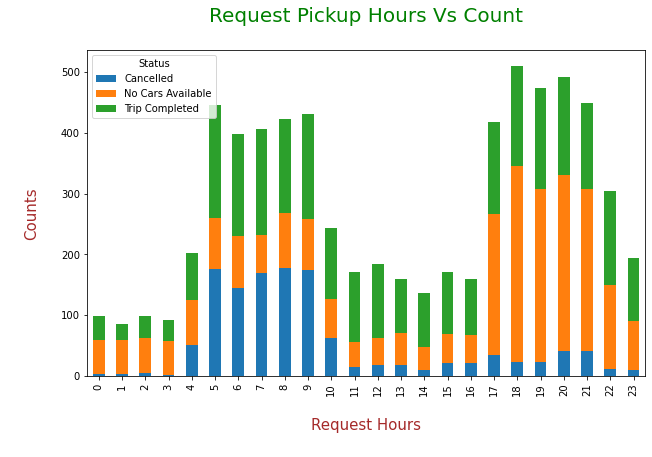

In [284]:
# To analyze the frequency of request hours
car_rent.groupby(['Request_Hour', 'Status']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (10,6), edgecolor='None')
plt.title("Request Pickup Hours Vs Count\n", fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("\nRequest Hours\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("\nCounts\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


##### Inferences:
- As per the above grpah it is clear that most Request Hours are 'Morning' and 'Evening' as most of the people may prefer these time slots.
- Whereas, between **4:00 A.M. to 10:00 A.M.** **'Cancelled'** Trips are more than 'Midnight' and during the day hours.
- Between **5:00 P.M. 10:00 P.M.** most of **'Unavailability of Cars** is high than Trip completed.
- Therefore these 2 time slots are Problemetic.


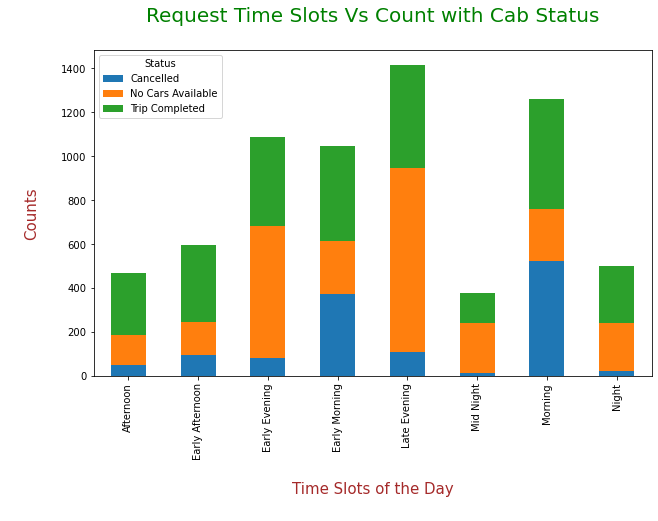

In [285]:
# To analyze the Problemetic Time Slots between Midnight to Modinight.
car_rent.groupby(['Time_Slots', 'Status']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (10,6), edgecolor='None')
plt.title("Request Time Slots Vs Count with Cab Status\n", fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("\nTime Slots of the Day\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("\nCounts\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


##### Inferences:
- As per the above stacked bar graph it is clear that most **problmetic time slots** are **'Early Evening' and 'Late Evening'** hours when there are **less availablity** of cars for rent.
- Whereas, during **'Early Morning' and 'Morning'** maximum cabs got **'cancelled'.**

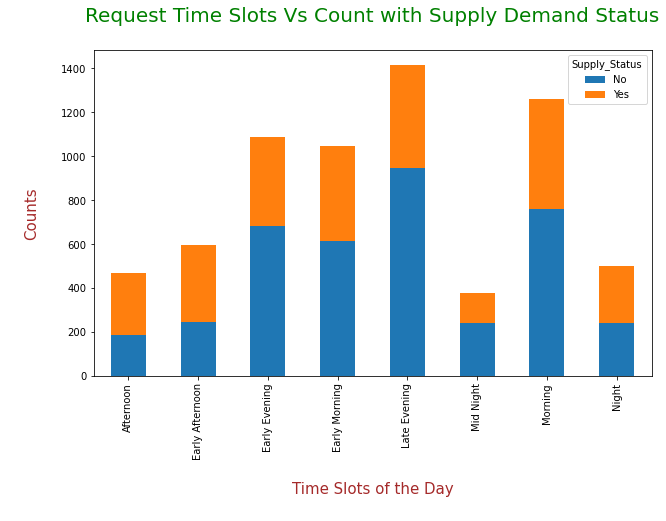

In [286]:
# To analyze the Problemetic Time Slots between Midnight to Modinight.
car_rent.groupby(['Time_Slots', 'Supply_Status']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (10,6), edgecolor='None')
plt.title("Request Time Slots Vs Count with Supply Demand Status\n", fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("\nTime Slots of the Day\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("\nCounts\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


##### Inferences:
- According to the staged Bar chart it is clear that the maximum **‘Supply-Demand gap** is during the **‘Late Evening’** times and then during **‘Morning’** time slots.


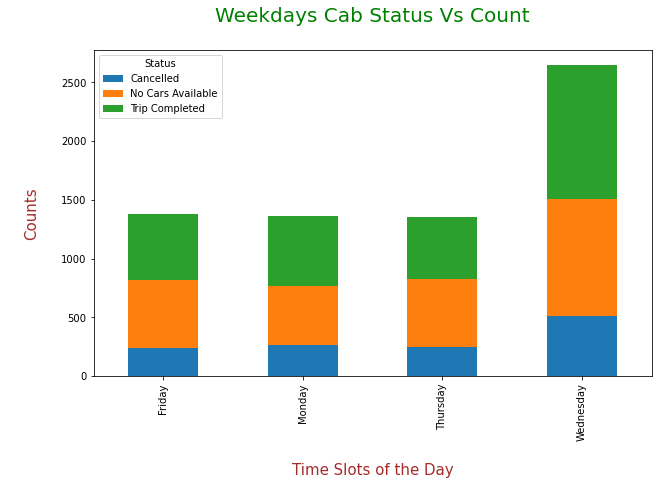

In [287]:
# To analyze the Problemetic or request Weekdays
car_rent.groupby(['Request_Weekday', 'Status']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (10,6), edgecolor='None')
plt.title("Weekdays Cab Status Vs Count\n", fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("\nTime Slots of the Day\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("\nCounts\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


##### Inferences:
- As per the above graph it is clera that almost everyday of the week there is a Demand-Supply gap but on Wednesday it is higher as requests are hgiher.

##### To anaylyze Critical/Problmetic Pickup Points
- After getting 'Request hours' and critical 'Time slots' of the day now we need to analyze 'Critical/Problmetic' Pickup Points.

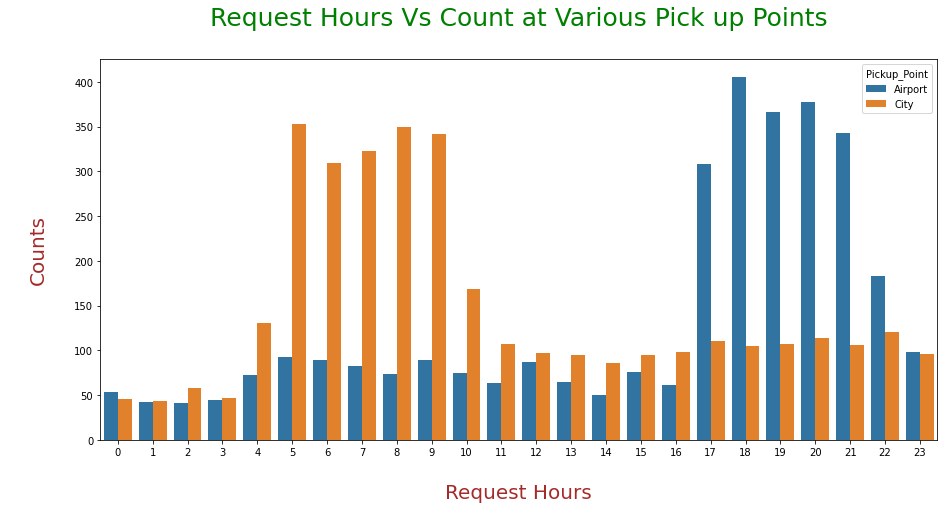

In [288]:
# To analyze Pickup Points Vs Request Hours
fig = plt.figure(figsize=(15,7))
sns.countplot(data = car_rent, x = car_rent['Request_Hour'], hue = car_rent['Pickup_Point'])
plt.title("Request Hours Vs Count at Various Pick up Points\n", fontdict={'fontsize':25,'fontweight':5,'color':'Green'})
plt.xlabel("\nRequest Hours\n",fontdict={'fontsize':20,'fontweight':5,'color':'Brown'})
plt.ylabel("\nCounts\n",fontdict={'fontsize':20,'fontweight':5,'color':'Brown'})
plt.show()


##### Inferences:
- As per the above grpah it is clear that during **4:00 A.M. to 10:00 A.M.** maximum pickup requests are from **'City-Airport'**.
- Whereas, during **5:00 P.M. to 10:00 P.M.** **'Airport' to 'City'** pickup  requests are more. 

##### Demand-Supply Gap Analysis:
- Analyze Demand Supply Gap seperately at two different Pickup (Airport, City) Points 

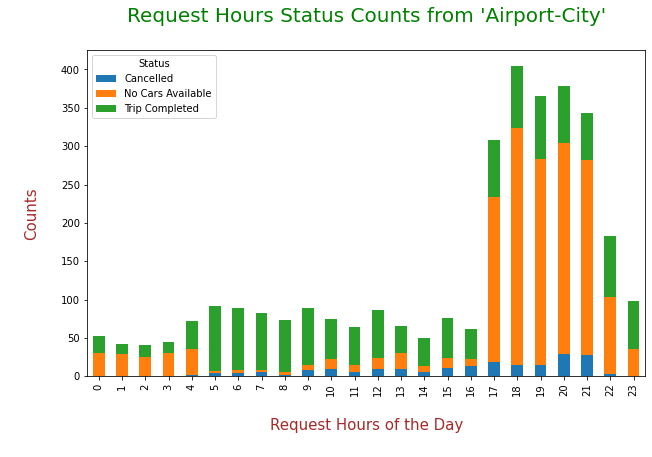

In [289]:
# To analyze Demand Supply gap from 'Airport to City'
car_rent[(car_rent['Pickup_Point']=='Airport')].groupby(['Request_Hour', 'Status']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (10,6), edgecolor='None')
plt.title("Request Hours Status Counts from 'Airport-City'\n", fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("\nRequest Hours of the Day\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("\nCounts\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


##### Inferences:
- For **'Airport-City'** **Problmetic Hours** are between **5:00 P.M. to 10:00 P.M.** when Request/Demand is high but simultaneously 'Cancelled' trips are also high.
- Therefore, it is clear that during this time slot there is a **higher Demand -Supply Gap**.
        

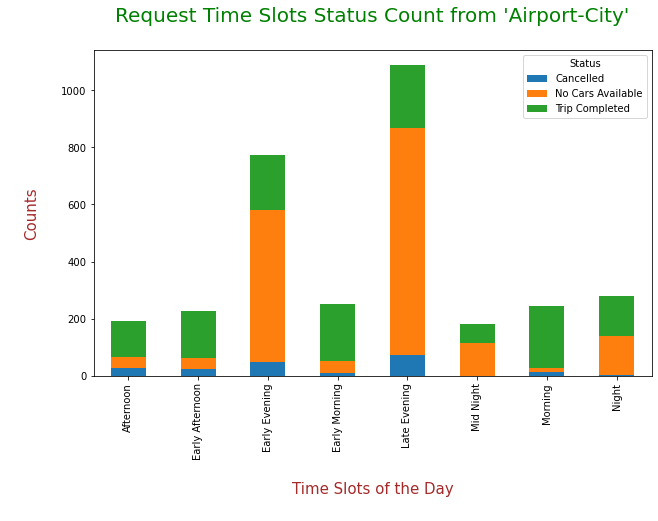

In [290]:
# To analyze Demand Supply gap from 'Airport to City'
car_rent[(car_rent['Pickup_Point']=='Airport')].groupby(['Time_Slots', 'Status']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (10,6), edgecolor='None')
plt.title("Request Time Slots Status Count from 'Airport-City'\n", fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("\nTime Slots of the Day\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("\nCounts\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


##### Inferences:
- For **'Airport-City'** **Problmetic Time Slots** are **Early Evening and Late Evening** when Request/Demand is high but simultaneously 'No CArs Availability' is also high.
- Therefore, it is clear that during this time slot there is a **higher Demand -Supply Gap**.
        

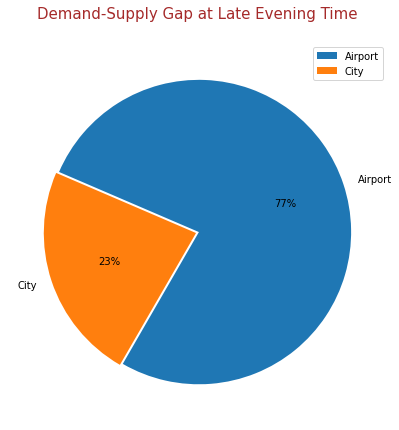

In [291]:
# To get Pie distribution for the most Problemetic Time slots for both the pickup Points
plt.figure(figsize=(7,7))
expl = (0.01, 0.01)
trip_label = ['Airport', 'City']
car_rent[car_rent['Time_Slots']=='Late Evening'].groupby(['Pickup_Point']).size().plot(kind='pie', autopct = '%1.0f%%', explode=expl, startangle = -120, stacked=True)
plt.title("Demand-Supply Gap at Late Evening Time\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.legend(trip_label, loc='upper right')
plt.ylabel("")
plt.show()


##### Inferences:
- Above Pie chart shows that during **Morning** time slots **'Demand-Supply Gap** is **higher** at **'Airport'** pickup than 'City'.
- This could be because of cab driver can get most of the requests in 'City' therefore they don't prefer to go to the 'Airport'.

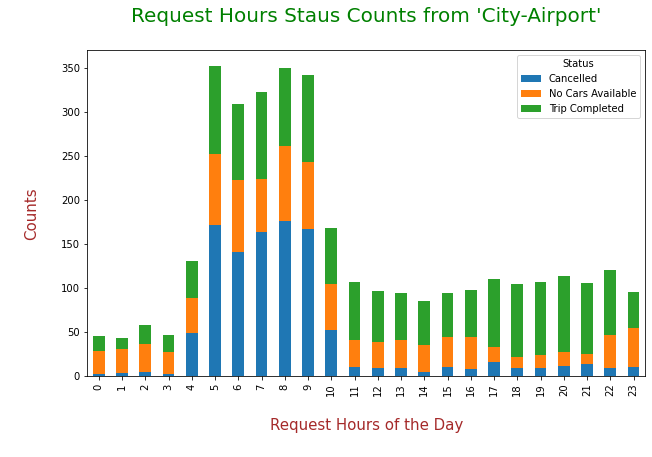

In [292]:
# To analyze Demand Supply gap from 'City to Airport'
car_rent[(car_rent['Pickup_Point']=='City')].groupby(['Request_Hour', 'Status']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (10,6), edgecolor='None')
plt.title("Request Hours Staus Counts from 'City-Airport'\n", fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("\nRequest Hours of the Day\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("\nCounts\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


##### Inferences:
- For **'City-Airport'** **Problmetic time slots** are between **4:00 A.M. to 10:00 A.M.** when Request/Demand is high but simultaneously 'Cancelled' trips are also high.
- Therefore, it is clear that during this time slot there is a **higher Demand -Supply Gap**.
        

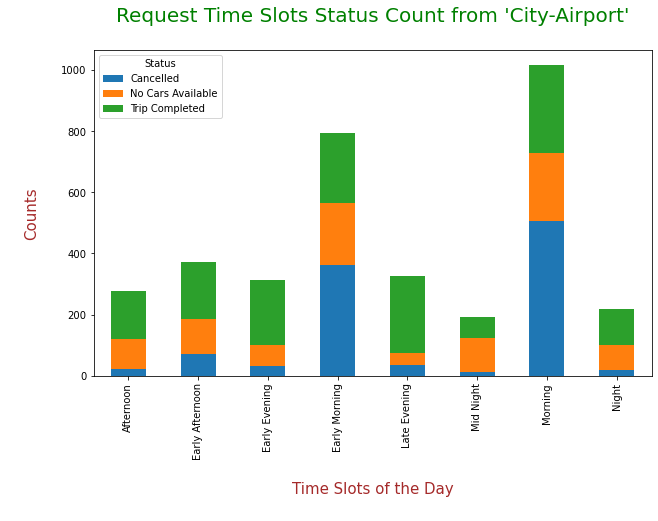

In [293]:
# To analyze Demand Supply gap from 'City to Airport '
car_rent[(car_rent['Pickup_Point']=='City')].groupby(['Time_Slots', 'Status']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (10,6), edgecolor='None')
plt.title("Request Time Slots Status Count from 'City-Airport'\n", fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("\nTime Slots of the Day\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("\nCounts\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


##### Inferences:
- For **'City-Airport'** **Problmetic time slots** are **Early Morning and Morning** when Request/Demand is high but simultaneously 'Cancelled' trips are also high.
- Therefore, it is clear that during this time slot there is a **Higher Demand -Supply Gap**.
        

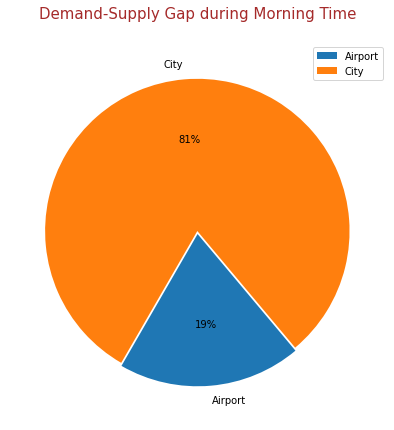

In [294]:
# To get Pie distribution for the most Problemetic Time slots for both the pickup Points
plt.figure(figsize=(7,7))
expl = (0.01, 0.01)
trip_label = ['Airport', 'City']
car_rent[car_rent['Time_Slots']=='Morning'].groupby(['Pickup_Point']).size().plot(kind='pie', autopct = '%1.0f%%',y='Time_Slots', explode=expl, startangle = -120, stacked=True)
plt.title("Demand-Supply Gap during Morning Time\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.legend(trip_label, loc='upper right')
plt.ylabel("")
plt.show()


##### Inferences:
- Above Pie chart shows that during **Morning** time slots **'Demand-Supply Gap** is **higher** at **'City'** pickup than 'Airport'.
- This could be because of cab drivers can get most of the requests at 'Airport' in comparision to 'City'.


#### To analyze Demand-Supply Gap on Weekdays at each of the pickup points

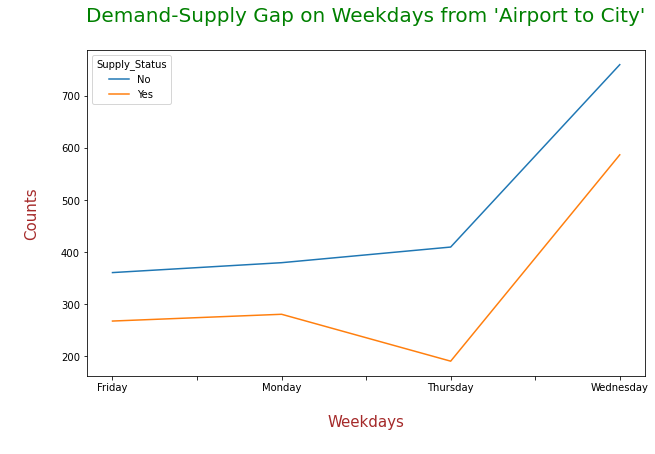

In [295]:
# To analyze Demand Supply gap from 'Airport to City'
car_rent[(car_rent['Pickup_Point']=='Airport')].groupby(['Request_Weekday', 'Supply_Status']).Supply_Status.count().unstack().plot.line(figsize = (10,6))
plt.title("Demand-Supply Gap on Weekdays from 'Airport to City'\n", fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("\nWeekdays\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("\nCounts\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


##### Inferences:
- As per the above graph it is clear that from **'Airport to City'** almost everyday pf the week there is big demand supply gap but still on **'Thursday'** it is little high as requests are also high.


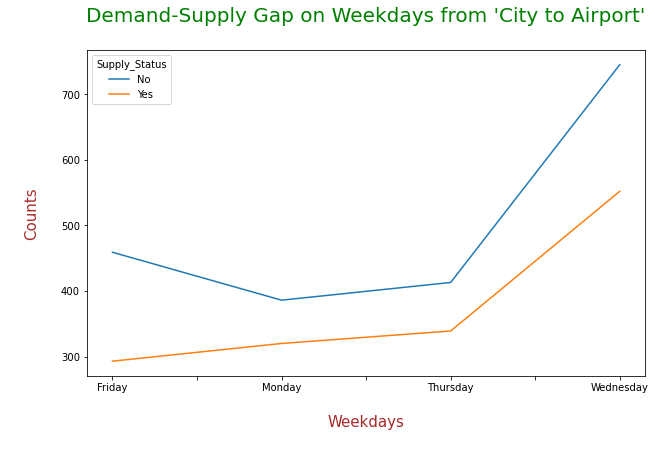

In [296]:
# To analyze Demand Supply gap from 'City to Airport'
car_rent[(car_rent['Pickup_Point']=='City')].groupby(['Request_Weekday', 'Supply_Status']).Supply_Status.count().unstack().plot.line(figsize = (10,6))
plt.title("Demand-Supply Gap on Weekdays from 'City to Airport'\n", fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("\nWeekdays\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("\nCounts\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


##### Inferences:
- As per the above graph it is clear that from **'City to Airport'** almost everyday of the week there is demand supply gap but still on **'Wednesday'** it is little high as requests are also high.


#### Sub Task 3.3: Bivariate/Multivariate Analysis

##### To calculate Demand-Supply Gap from 'City-Airport'

In [297]:
# To count Demand-Supply Gap at 'City' at various pickup hours.
car_rent_city = Pickup_City.groupby('Request_Hour', as_index=False).agg({'Request_id':'count', 'Driver_id':'count'})
car_rent_city['Sup_Dem_Gap'] = car_rent_city['Request_id'] - car_rent_city['Driver_id'] 
car_rent_city


,Request_Hour,Request_id,Driver_id,Sup_Dem_Gap
0,0,46,20,26
1,1,43,16,27
2,2,58,26,32
3,3,47,21,26
4,4,131,91,40
5,5,353,272,81
6,6,309,227,82
7,7,323,263,60
8,8,350,264,86
9,9,342,266,76


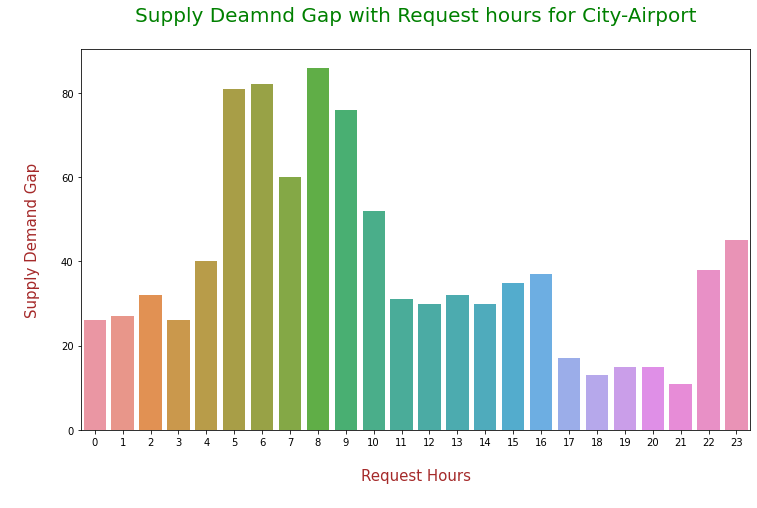

In [298]:
# To analyze Supply-Demand gap from 'City-Airport'.
fig = plt.figure(figsize=(12,7))
sns.barplot(x='Request_Hour', y = 'Sup_Dem_Gap', data=car_rent_city)
plt.title("Supply Deamnd Gap with Request hours for City-Airport\n", fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("\nRequest Hours\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("\nSupply Demand Gap\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


#### Inferences:
- From above bar plot it is clear that for **'City-Airport'** Pickups **Morning Hours** (4:00 A.M. to 10:00 A.M.) has very **high Supply-Demand** gap.  

##### To calculate Demand-Supply Gap from 'Airport-City'

In [299]:
# To count Demand-Supply Gap from 'Airport-City' at various pickup hours.
car_rent_Airport = Pickup_Airport.groupby('Request_Hour', as_index=False).agg({'Request_id':'count', 'Driver_id':'count'})
car_rent_Airport['Sup_Dem_Gap'] = car_rent_Airport['Request_id'] - car_rent_Airport['Driver_id'] 
car_rent_Airport


,Request_Hour,Request_id,Driver_id,Sup_Dem_Gap
0,0,53,23,30
1,1,42,13,29
2,2,41,16,25
3,3,45,15,30
4,4,72,38,34
5,5,92,89,3
6,6,89,85,4
7,7,83,80,3
8,8,73,69,4
9,9,89,82,7


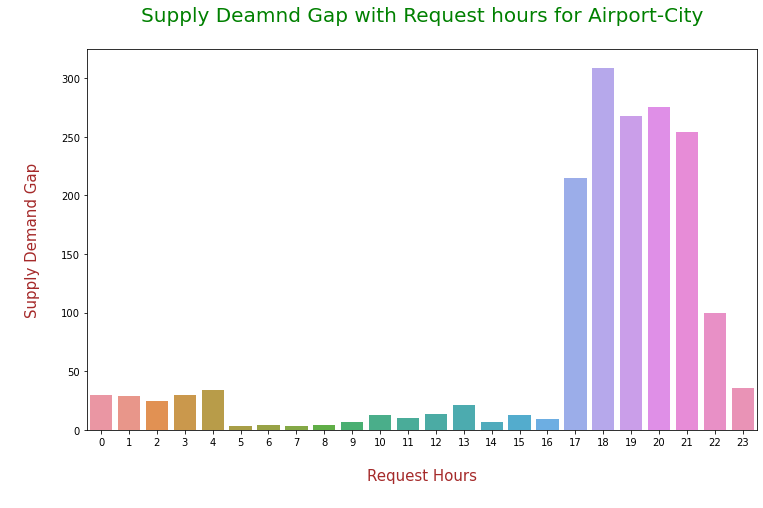

In [300]:
# To analyze Supply-Demand gap from 'Airport-City'.
fig = plt.figure(figsize=(12,7))
sns.barplot(x='Request_Hour', y = 'Sup_Dem_Gap', data=car_rent_Airport)
plt.title("Supply Deamnd Gap with Request hours for Airport-City\n", fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("\nRequest Hours\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("\nSupply Demand Gap\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


#### Inferences:
- From above bar plot it is clear that for **'Airport-City'** Pickups **Evening Hours** (5:00 P.M. to 10:00 P.M.) has very **high Supply-Demand** gap.  

### Outcomes/Conclusion:

##### A) Pickup Point Airport:

- According to the various above analysis and visualizations for the pickup point Airport, it is clear that the **Evening Hours (5:00 P.M.-10:00 P.M.)** are most critical when there is a **hugh Supply-Demand Gap** due to unavailability of Uber cabs.
- Although there is a **Supply-Demand gap** on all days of the week but still it is little **higher on Thursday** for the mentioned ppickup point (Airport).
- Whereas, after analysis it has been observed that most of the **requests hours** are also during the same duration **(evening -5:00 P.M.-10:00 P.M.)**.
- All such cancellations or unavailability of Cabs during Evening hours from Airport to City, might be due to late evening hours and cab drivers wants to go back to home or they are in the city itself.

##### B) Pickup Point City:

- According to the various above analysis and visualizations for the pickup point Airport, it is clear that the **Morning Hours (4:00 A.M.-10:00 A.M.)** are most critical when there is a **hugh Supply-Demand Gap** due to unavailability of Uber cabs.
- Although there is a **Supply-Demand gap** on all days of the week but still it is little **higher on Wednesday** for the mentioned ppickup point (Airport).
- Whereas, after analysis it has been observed that most of the **requests hours** are also during the same duration **(evening -4:00 A.M.-10:00 A.M.)**.
- All such cancellations or unavailability of Cabs during Morning hours from City to Airport which might be due to getting cabs in city itself during the morning and drivers don't want to go for a long distance.


### Recommendations

- To avoid all such cancellations or No-availability of cabs Uber can do the following things.
     - Can increase more no. of cabs on both the pickup points.
     - May provide extra benefits or bonus to the cab drivers during those critical hours for City- Airport or Airport to City.
     - Can apply penalty to that particular cab driver who cancelled the requests more than a certain no. (2-3) of bookings in a day for a particular pickup oints during the related critical hours.
     - May create a cab stand at Airport where cabs could be available all the time.

#### End of Uber Business Problem ####